In [1]:
import pandas as pd

In [2]:
name1880 = pd.read_csv('data/babynames/yob1880.txt',
                      names=['name','gender','births'])

In [3]:
years = range(1880, 2011)
names=[]
colums=['name','gender','births']

# 연도별 반복 저장
for year in years:
    path='data/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=colums)
    frame['year'] = year
    names.append(frame)

In [4]:
names = pd.concat(names, ignore_index=True)

In [5]:
names.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [6]:
total_births = names.pivot_table('births', index='year', 
                                 columns='gender', aggfunc=sum)

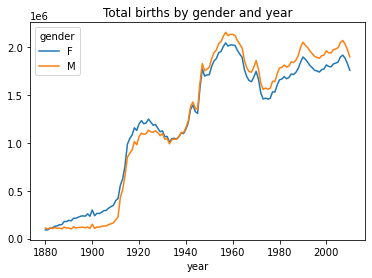

In [7]:
total_births.plot(title='Total births by gender and year');

In [8]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

In [9]:
names = names.groupby(['year','gender']).apply(add_prop)

In [10]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [11]:
grouped = names.groupby(['year','gender'])

In [12]:
top1000 = grouped.apply(get_top1000)

In [13]:
top1000.reset_index(inplace=True, drop=True)

In [14]:
top1000.head(2)

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618


In [15]:
boys = top1000[top1000.gender=='M']
girls = top1000[top1000.gender=='F']

In [16]:
total_birth = top1000.pivot_table('births', index='year', 
                              columns='name', aggfunc=sum)


In [17]:
total_birth.head(2)

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN


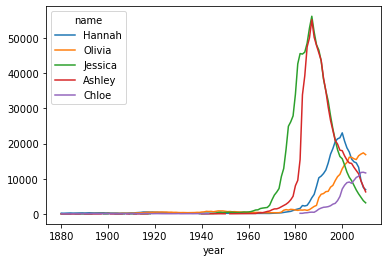

In [97]:
# subset = total_birth[['John', 'Harry', 'Mary', 'Marilyn','Grace']]
subset = total_birth[['Hannah','Olivia','Jessica','Ashley','Chloe']]
subset.plot()
# subset.plot(subplots=True, figsize=(12,10), grid=False,
#            title="Number of births per year");

In [19]:
import numpy as np

In [20]:
table = top1000.pivot_table('prop', index='year',
                           columns='gender', aggfunc=sum)

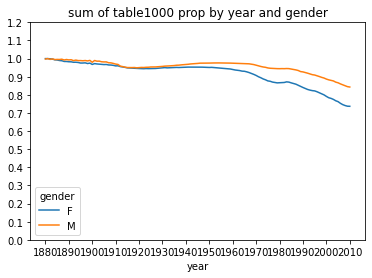

In [21]:
table.plot(title='sum of table1000 prop by year and gender',
          yticks=np.linspace(0,1.2, 13),
          xticks=range(1880,2020,10));

In [22]:
df = boys[boys.year == 2010]

In [23]:
df.head()

,name,gender,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [24]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(0.5)+1

In [25]:
diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)

In [26]:
diversity.head(2)

year  gender
1880  F         38
      M         14
dtype: int64

In [27]:
diversity = diversity.unstack()
diversity.head(2)

gender,F,M
year,,
1880,38,14
1881,38,14


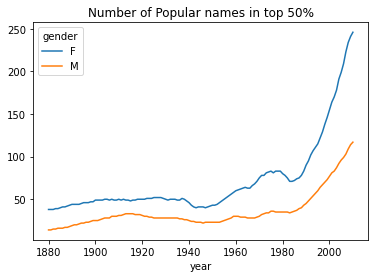

In [28]:
diversity.plot(title='Number of Popular names in top 50%');

In [29]:
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [30]:
table = names.pivot_table('births', index=last_letters,
                         columns=['gender', 'year'], 
                          aggfunc=sum)

In [31]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

gender              F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [32]:
letter_prop = subtable/subtable.sum()
letter_prop.head()

gender              F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

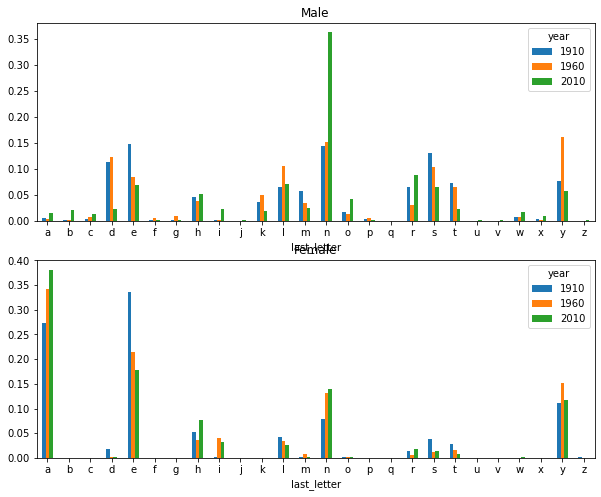

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male');
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female');

In [34]:
letter_prop = table/table.sum()
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T

In [35]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


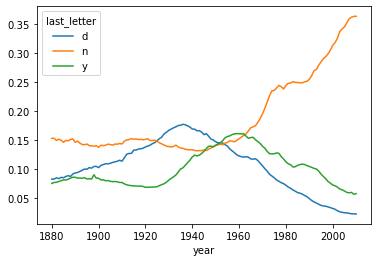

In [36]:
dny_ts.plot();

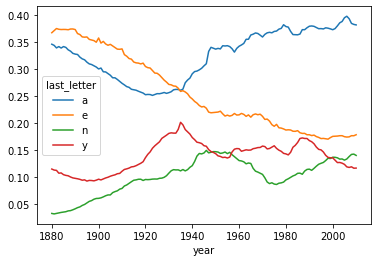

In [37]:
aney_ts = letter_prop.loc[['a','e','n','y'], 'F'].T
aney_ts.plot();

In [38]:
all_names = pd.Series(top1000.name.unique())

In [39]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [40]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [41]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [42]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [43]:
table = filtered.pivot_table('births', index='year', 
                             columns="gender", aggfunc=sum)

In [44]:
table = table.div(table.sum(1), axis=0)

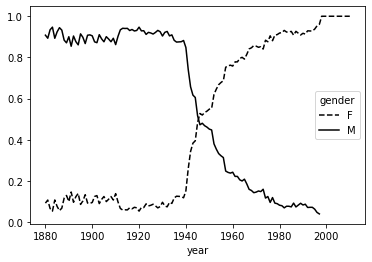

In [45]:
table.plot(style={'M':'k-', 'F':'k--'});